### Netflix Data

> ***The Netflix Dataset has information about the TV shows and Movies aailable on Netflix till 2021. We will analyze this data using Pandas Dataframe and through different tools..***

In [1]:
### Importing Required Libraries...
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
### Importing the Dataset..
df=pd.read_csv("8. Netflix Dataset.csv")

### 1. Basic Analysis of the Data

In [3]:
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
df.shape
# There are 7789 records(rows) and 11 features(columns) in the dataset..

(7789, 11)

In [5]:
df.size
# In our data set there are 85679 data elements..

85679

In [6]:
df.info()
# All the features are object type..

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [7]:
df.index

RangeIndex(start=0, stop=7789, step=1)

In [8]:
df.columns

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')

In [9]:
df['Show_Id'].nunique()
# It contains unique values, if it is required we can use this data as our index..

7787

In [10]:
df['Category'].value_counts()
# We have data of two type of categories :  Movies and TV shows..

Movie      5379
TV Show    2410
Name: Category, dtype: int64

In [11]:
df['Title'].nunique()
# It also contains unique data..

7787

In [12]:
df['Country'].nunique()
# Where the show/cinema was created..(Combinations of countries are avialable : May be shooted in different places..)

681

In [13]:
df['Rating'].value_counts()
# There are 14 types of rating categories are available..

TV-MA       2865
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: Rating, dtype: int64

In [14]:
df['Cast'][7766]


'Shah Rukh Khan, Anushka Sharma, Katrina Kaif, Mohammed Zeeshan Ayyub, Tigmanshu Dhulia, Sheeba Chaddha, Brijendra Kala, Mallika Dua, Abhay Deol, Madhavan'

In [15]:
df['Cast'][79]

'Darlene Love, Merry Clayton, Lisa Fischer, Táta Vega, Claudia Lennear, Judith Hill, Bruce Springsteen, Mick Jagger, Stevie Wonder, Sting, Bette Midler, Cissy Houston, Sheryl Crow, Tata Vega'

In [16]:
# It looks like the first name of the cast refers to the Lead Actor..

In [17]:
df['Type'][100]
# It looks like the first Name in the 'Type' directly refers to the movie category..

'Comedies, Dramas, International Movies'

### Let's solve some questions first...

***1.  Is there any Duplicate Record in this dataset? If yes, then remove the duplicate records.***

In [18]:
df[df.duplicated()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
6300,s684,Movie,Backfire,Dave Patten,"Black Deniro, Byron ""Squally"" Vinson, Dominic ...",United States,"April 5, 2019",TV-MA,97 min,"Dramas, Independent Movies, Thrillers",When two would-be robbers accidentally kill a ...
6622,s6621,Movie,The Lost Okoroshi,Abba T. Makama,"Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...",Nigeria,"September 4, 2020",TV-MA,94 min,"Comedies, Dramas, Independent Movies",A disillusioned security guard transforms into...


In [19]:
# This two records contain duplicate data so it is better to remove them..
df.drop(index=[6300,6622],axis=0,inplace=True)

In [20]:
df[df.duplicated()]
# No duplicate record is present now..
# we can also use : df.drop_duplicates(inplace=True) to drop duplicate values..

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description


***2. Is there any missing or null values available in our dataset? Show it through heatmap.***

In [21]:
df.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

<AxesSubplot:>

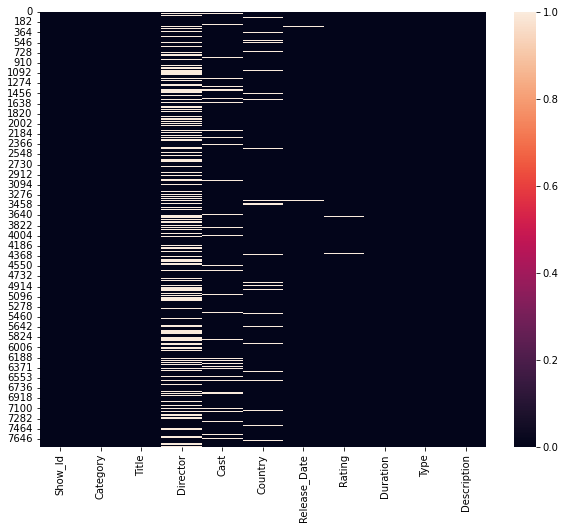

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())
# There are null values in our data set.. These null/missing values exist in Title,Cast,Country, Release_Date, Rating column..

***3. For 'House of Cards', what is the Show Id and who is the director of the show?***

In [23]:
df[df['Title']=='House of Cards'][['Show_Id','Director']]
# Here we can use : 
# df['Title'].isin('House of Cards') or df['Title'].str.contains('House of Cards') method for checking..

,Show_Id,Director
2832,s2833,"Robin Wright, David Fincher, Gerald McRaney, J..."


***4. In which year highest number of the TV Shows and Movies were released? Show it using Bar Graph.*** ***Important***

In [24]:
df['Release_Date']=pd.to_datetime(df['Release_Date'])
# Previously the 'Release_Date' was a object type column which we have converted into DateTime object 
#so that we can use different functions on it..

In [25]:
df['Release_Date'].dt.year.value_counts()# In the year of 2019 highest numbers of TV shows and Movies are produced..
# Though Release_Date column contains null values but we have only extracted the year from the individual timestamps 
#ignoring the null values and applied value_counts() method over the extracted data..

2019.0    2153
2020.0    2009
2018.0    1685
2017.0    1225
2016.0     443
2021.0     117
2015.0      88
2014.0      25
2011.0      13
2013.0      11
2012.0       3
2008.0       2
2009.0       2
2010.0       1
Name: Release_Date, dtype: int64

<AxesSubplot:>

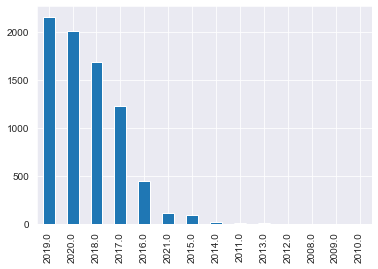

In [26]:
sns.set_style('darkgrid')
# Now let's plot the Bar Graph..
df['Release_Date'].dt.year.value_counts().plot(kind='bar')

***5. How many Movies and TV Shows are there in the Dataset? Show the Bar Graph..***

In [27]:
df['Category'].value_counts()

Movie      5377
TV Show    2410
Name: Category, dtype: int64

<AxesSubplot:>

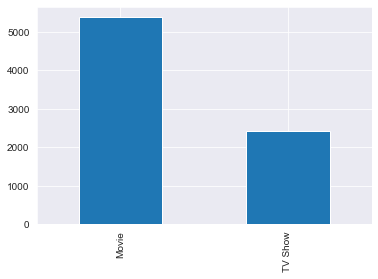

In [28]:
df['Category'].value_counts().plot(kind='bar')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Category', ylabel='count'>

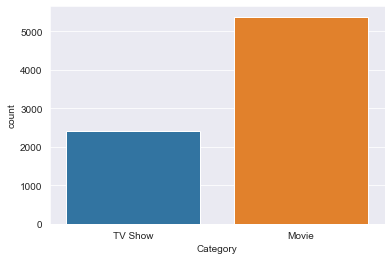

In [29]:
# We can do the similar thing using seaborn's countplot...
sns.countplot(df['Category'])

In [30]:
# It is clear that more movies are created compared to TV Shows..

***6. Show all the Movies that were released in year 2020.***

In [31]:
df[(df['Release_Date'].dt.year==2020.0)&(df['Category']=='Movie')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
14,s15,Movie,3022,John Suits,"Omar Epps, Kate Walsh, Miranda Cosgrove, Angus...",United States,2020-03-19,R,91 min,"Independent Movies, Sci-Fi & Fantasy, Thrillers",Stranded when the Earth is suddenly destroyed ...
27,s28,Movie,#Alive,Cho Il,"Yoo Ah-in, Park Shin-hye",South Korea,2020-09-08,TV-MA,99 min,"Horror Movies, International Movies, Thrillers","As a grisly virus rampages a city, a lone man ..."
28,s29,Movie,#AnneFrank - Parallel Stories,"Sabina Fedeli, Anna Migotto","Helen Mirren, Gengher Gatti",Italy,2020-07-01,TV-14,95 min,"Documentaries, International Movies","Through her diary, Anne Frank's story is retol..."
...,...,...,...,...,...,...,...,...,...,...,...
7762,s7761,Movie,Zaki Chan,Wael Ihsan,"Ahmed Helmy, Yasmin Abdulaziz, Hassan Hosny, H...",Egypt,2020-05-19,TV-PG,109 min,"Comedies, International Movies, Romantic Movies",An unqualified young man has his work cut out ...
7783,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7786,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,2020-09-25,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."


In [32]:
len(df[(df['Release_Date'].dt.year==2020.0)&(df['Category']=='Movie')])

1312

In [33]:
# There are 1312 movies which were released in the year of 2020.

***7. Show only the Titles of all TV shows that were released in India only.***

In [34]:
df[(df['Country']=='India')&(df['Category']=='TV Show')]['Title']

86            21 Sarfarosh: Saragarhi 1897
132                              7 (Seven)
340                           Agent Raghav
364                           Akbar Birbal
533                    Anjaan: Rural Myths
                       ...                
6249                  The Creative Indians
6400    The Golden Years with Javed Akhtar
6469                The House That Made Me
7294                            Typewriter
7705                       Yeh Meri Family
Name: Title, Length: 71, dtype: object

***8. Show top 10 Directors, who gave the highest number of TV Shows and Movies to Netflix?***

In [35]:
df['Director'].value_counts()[:10]

Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Youssef Chahine           12
Martin Scorsese           12
Steven Spielberg          10
David Dhawan               9
Hakan Algül                8
Name: Director, dtype: int64

***9. Show all the Records, where Category is Movie and Type is Comedies" or "Courtry is United Kingdom".***

In [36]:
df[(df['Category']=='Movie') & ((df['Type'].str.contains('Comedies') | (df['Country'].str.contains('United Kingdom'))))]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
18,s19,Movie,15-Aug,Swapnaneel Jayakar,"Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...",India,2019-03-29,TV-14,124 min,"Comedies, Dramas, Independent Movies","On India's Independence Day, a zany mishap in ..."
19,s20,Movie,'89,NaN,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom,2018-05-16,TV-PG,87 min,Sports Movies,"Mixing old footage with interviews, this is th..."
33,s34,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
34,s35,Movie,#Roxy,Michael Kennedy,"Jake Short, Sarah Fisher, Booboo Stewart, Dann...",Canada,2019-04-10,TV-14,105 min,"Comedies, Romantic Movies",A teenage hacker with a huge nose helps a cool...
36,s37,Movie,#Selfie,Cristina Jacob,"Flavia Hojda, Crina Semciuc, Olimpia Melinte, ...",Romania,2019-06-01,TV-MA,125 min,"Comedies, Dramas, International Movies","Two days before their final exams, three teen ..."
...,...,...,...,...,...,...,...,...,...,...,...
7774,s7773,Movie,Zipi & Zape y la Isla del Capitan,Oskar Santos,"Teo Planell, Toni Gómez, Elena Anaya, Iria Cas...",Spain,2017-07-01,TV-PG,105 min,"Children & Family Movies, Comedies","At Christmas, Zip and Zap take a trip with the..."
7780,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
7783,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...


In [37]:
df[(df['Category']=='Movie') & ((df['Type']=='Comedies')|(df['Country']=='United Kingdom'))]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
19,s20,Movie,'89,NaN,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom,2018-05-16,TV-PG,87 min,Sports Movies,"Mixing old footage with interviews, this is th..."
33,s34,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
72,s73,Movie,17 Again,Burr Steers,"Zac Efron, Leslie Mann, Matthew Perry, Thomas ...",United States,2021-01-01,PG-13,102 min,Comedies,"Nearing a midlife crisis, thirty-something Mik..."
82,s83,Movie,2036 Origin Unknown,Hasraf Dulull,"Katee Sackhoff, Ray Fearon, Julie Cox, Steven ...",United Kingdom,2018-12-20,TV-14,95 min,Sci-Fi & Fantasy,Working with an artificial intelligence to inv...
84,s85,Movie,21 & Over,"Jon Lucas, Scott Moore","Miles Teller, Skylar Astin, Justin Chon, Sarah...",United States,2019-04-16,R,93 min,Comedies,Jeff's straight-and-narrow life changes abrupt...
...,...,...,...,...,...,...,...,...,...,...,...
7634,s7633,Movie,Wine Country,Amy Poehler,"Amy Poehler, Maya Rudolph, Ana Gasteyer, Rache...",United States,2019-05-10,R,104 min,Comedies,When longtime friends meet up for a wine-soake...
7649,s7648,Movie,Without Gorky,Cosima Spender,NaN,United Kingdom,2017-05-31,TV-14,80 min,Documentaries,A filmmaker trains the camera on her own famil...
7664,s7663,Movie,Work It,Laura Terruso,"Sabrina Carpenter, Jordan Fisher, Liza Koshy, ...",United States,2020-08-07,TV-14,94 min,Comedies,A brilliant but clumsy high school senior vows...
7688,s7687,Movie,XV: Beyond the Tryline,Pierre Deschamps,NaN,United Kingdom,2020-03-18,TV-14,91 min,"Documentaries, Sports Movies","Set against the 2015 Rugby World Cup, this doc..."


In [38]:
## Both the above are correct. It only depends on the requestor, what they want..

***10. In how many Movies/Shows, Tom Cruise was cast?***

In [39]:
df['Cast'].isnull().sum()
#There are 718 null/missing values in our data. We need to deal with this missing values first to get our answer..

718

In [40]:
import copy

In [41]:
ndf=copy.deepcopy(df)

In [42]:
ndf.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


In [43]:
df.dropna(inplace=True)

In [44]:
df.isnull().sum()

Show_Id         0
Category        0
Title           0
Director        0
Cast            0
Country         0
Release_Date    0
Rating          0
Duration        0
Type            0
Description     0
dtype: int64

In [45]:
#We have removed all the missing values..

In [46]:
df[df['Cast'].str.contains('Tom Cruise')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
3860,s3861,Movie,Magnolia,Paul Thomas Anderson,"Jeremy Blackman, Tom Cruise, Melinda Dillon, A...",United States,2020-01-01,R,189 min,"Dramas, Independent Movies","Through chance, human action, past history and..."
5071,s5071,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,2019-07-01,R,134 min,"Classic Movies, Dramas",A fast-talking yuppie is forced to slow down w...


In [47]:
# There are only two movies where Tom Cruise was casted..

***11. What are the different ratings defined by Netflix?***

In [48]:
df['Rating'].value_counts()

TV-MA       1666
TV-14       1133
R            654
TV-PG        413
PG-13        375
PG           238
TV-G          80
TV-Y          71
TV-Y7         69
NR            62
G             38
UR             5
TV-Y7-FV       3
NC-17          2
Name: Rating, dtype: int64

In [49]:
df['Rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-G', 'TV-PG', 'NR', 'PG', 'G',
       'TV-Y7', 'TV-Y', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

***12. How many Movies got the TV-14 rating in Canda?***

In [50]:
df[(df['Rating']=='TV-14') & (df['Country']=='Canada')][df[(df['Rating']=='TV-14') & (df['Country']=='Canada')]['Category']=='Movie']

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
34,s35,Movie,#Roxy,Michael Kennedy,"Jake Short, Sarah Fisher, Booboo Stewart, Dann...",Canada,2019-04-10,TV-14,105 min,"Comedies, Romantic Movies",A teenage hacker with a huge nose helps a cool...
608,s609,Movie,At First Light,Jason Stone,"Stefanie Scott, Theodore Pellerin, Percy Hynes...",Canada,2018-12-27,TV-14,91 min,"Dramas, Sci-Fi & Fantasy",After mysterious lights imbue her with extraor...
1506,s1507,Movie,Counterfeiting in Suburbia,Jason Bourque,"Sarah Butler, Larissa Albuquerque, Kayla Walla...",Canada,2018-07-01,TV-14,88 min,"Dramas, Thrillers",Two teenagers print counterfeit money in their...
3713,s3714,Movie,Long Time Running,"Jennifer Baichwal, Nicholas de Pencier","Gord Downie, Paul Langlois, Gord Sinclair, Rob...",Canada,2017-11-12,TV-14,96 min,"Documentaries, International Movies, Music & M...",This documentary follows the 2016 tour of belo...
3956,s3957,Movie,"Martin Matte: La vie, la mort...eh la la..!",Jean-François Blais,Martin Matte,Canada,2019-10-14,TV-14,62 min,Stand-Up Comedy,Quebecois comedy star Martin Matte serves up e...
5336,s5336,Movie,Sadie's Last Days on Earth,Michael Seater,"Morgan Taylor Campbell, Clark Backo, Ricardo H...",Canada,2017-08-22,TV-14,94 min,"Comedies, Sci-Fi & Fantasy",High schooler Sadie Mitchell believes the worl...
5393,s5393,Movie,Sardaar ji,Rohit Jugraj,"Diljit Dosanjh, Neeru Bajwa, Mandy Takhar, Jas...",Canada,2017-12-01,TV-14,140 min,"Comedies, International Movies, Music & Musicals",When a palatial wedding venue turns out to be ...
7025,s7024,Movie,The Wrong Babysitter,George Mendeluk,"Daphne Zuniga, Seann Gallagher, Lisa Marie Car...",Canada,2019-06-18,TV-14,89 min,Thrillers,A widow searches for her missing teenage daugh...
7041,s7040,Movie,There's Something in the Water,"Ellen Page, Ian Daniel",Ellen Page,Canada,2020-03-27,TV-14,72 min,"Documentaries, International Movies",This documentary spotlights the struggle of mi...


In [51]:
df[(df['Rating']=='TV-14') & (df['Country']=='Canada')&(df['Category']=='Movie')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
34,s35,Movie,#Roxy,Michael Kennedy,"Jake Short, Sarah Fisher, Booboo Stewart, Dann...",Canada,2019-04-10,TV-14,105 min,"Comedies, Romantic Movies",A teenage hacker with a huge nose helps a cool...
608,s609,Movie,At First Light,Jason Stone,"Stefanie Scott, Theodore Pellerin, Percy Hynes...",Canada,2018-12-27,TV-14,91 min,"Dramas, Sci-Fi & Fantasy",After mysterious lights imbue her with extraor...
1506,s1507,Movie,Counterfeiting in Suburbia,Jason Bourque,"Sarah Butler, Larissa Albuquerque, Kayla Walla...",Canada,2018-07-01,TV-14,88 min,"Dramas, Thrillers",Two teenagers print counterfeit money in their...
3713,s3714,Movie,Long Time Running,"Jennifer Baichwal, Nicholas de Pencier","Gord Downie, Paul Langlois, Gord Sinclair, Rob...",Canada,2017-11-12,TV-14,96 min,"Documentaries, International Movies, Music & M...",This documentary follows the 2016 tour of belo...
3956,s3957,Movie,"Martin Matte: La vie, la mort...eh la la..!",Jean-François Blais,Martin Matte,Canada,2019-10-14,TV-14,62 min,Stand-Up Comedy,Quebecois comedy star Martin Matte serves up e...
5336,s5336,Movie,Sadie's Last Days on Earth,Michael Seater,"Morgan Taylor Campbell, Clark Backo, Ricardo H...",Canada,2017-08-22,TV-14,94 min,"Comedies, Sci-Fi & Fantasy",High schooler Sadie Mitchell believes the worl...
5393,s5393,Movie,Sardaar ji,Rohit Jugraj,"Diljit Dosanjh, Neeru Bajwa, Mandy Takhar, Jas...",Canada,2017-12-01,TV-14,140 min,"Comedies, International Movies, Music & Musicals",When a palatial wedding venue turns out to be ...
7025,s7024,Movie,The Wrong Babysitter,George Mendeluk,"Daphne Zuniga, Seann Gallagher, Lisa Marie Car...",Canada,2019-06-18,TV-14,89 min,Thrillers,A widow searches for her missing teenage daugh...
7041,s7040,Movie,There's Something in the Water,"Ellen Page, Ian Daniel",Ellen Page,Canada,2020-03-27,TV-14,72 min,"Documentaries, International Movies",This documentary spotlights the struggle of mi...


In [52]:
df[(df['Rating']=='TV-14') & (df['Country']=='Canada')&(df['Category']=='Movie')].shape

(9, 11)

In [53]:
# There are 9 movies which follows the above condition.

***13. How many TV Show got the 'R' rating after year 2018?***

In [54]:
ndf[(ndf['Release_Date'].dt.year>2018.0)&(ndf['Category']=='TV Show')&(ndf['Rating']=='R')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
6437,s6436,TV Show,The Hateful Eight: Extended Version,Quentin Tarantino,"Samuel L. Jackson, Kurt Russell, Jennifer Jaso...",NaN,2019-04-25,R,1 Season,TV Shows,Trapped at a stagecoach stop as a storm rages ...


In [55]:
# In this we have used our original which contains null values.

***14. What is the maximum duration of a Movie?Show on Netflix?***

In [56]:
pdf=copy.deepcopy(ndf)

In [57]:
pdf.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


In [58]:
pdf.reset_index(inplace=True)

In [59]:
pdf.head(2)

,index,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


In [60]:
pdf.drop(columns=['index'],axis=1,inplace=True)

In [61]:
pdf.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


In [62]:
pdf['Duration']

0       4 Seasons
1          93 min
2          78 min
3          80 min
4         123 min
          ...    
7782       99 min
7783      111 min
7784       44 min
7785     1 Season
7786       90 min
Name: Duration, Length: 7787, dtype: object

In [63]:
pdf[pdf['Category']=='TV Show']['Duration'].apply(lambda a:a.split(' ')[0]).max()

'9'

In [64]:
pdf[pdf['Category']=='TV Show']['Duration'].apply(lambda a:a.split(' ')[0])[pdf[pdf['Category']=='TV Show']['Duration'].apply(lambda a:a.split(' ')[0])=='9'].index

Int64Index([468, 1181, 1431, 2237, 4404, 5819, 6718, 6983], dtype='int64')

In [65]:
pdf.iloc[[468, 1181, 1431, 2237, 4404, 5819, 6718, 6983]]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
468,s469,TV Show,American Horror Story,NaN,"Evan Peters, Sarah Paulson, Jessica Lange, Den...",United States,2020-11-13,TV-MA,9 Seasons,"TV Horror, TV Mysteries, TV Thrillers",This twisted Emmy-winning drama plays upon the...
1181,s1182,TV Show,Call the Midwife,Philippa Lowthorpe,"Vanessa Redgrave, Bryony Hannah, Helen George,...",United Kingdom,2020-09-15,TV-MA,9 Seasons,"British TV Shows, International TV Shows, TV D...",This period drama set in impoverished East Lon...
1431,s1432,TV Show,Club Friday The Series 6,NaN,"Puttichai Kasetsin, Kongtoranin Lalana, Preech...",NaN,2019-03-09,TV-MA,9 Seasons,"International TV Shows, Romantic TV Shows, TV ...",Based on a Thai radio show that gives love adv...
2237,s2238,TV Show,Forensic Files,NaN,Peter Thomas,United States,2016-09-01,TV-MA,9 Seasons,"Crime TV Shows, Docuseries, Science & Nature TV",Detectives and crime lab technicians use the l...
4404,s4405,TV Show,Naruto,Hayato Date,"Junko Takeuchi, Chie Nakamura, Noriaki Sugiyam...",Japan,2019-09-01,TV-14,9 Seasons,"Anime Series, International TV Shows","Guided by the spirit demon within him, orphane..."
5819,s5819,TV Show,Still Game,NaN,"Ford Kiernan, Paul Riley, Jane McCarry, Greg H...",United Kingdom,2020-12-30,TV-14,9 Seasons,"British TV Shows, Classic & Cult TV, TV Comedies",Scottish pensioners Jack and Victor make the m...
6718,s6719,TV Show,The Office (U.S.),NaN,"Steve Carell, John Krasinski, Jenna Fischer, R...",United States,2016-01-01,TV-14,9 Seasons,TV Comedies,This hit comedy chronicles the foibles of disg...
6983,s6984,TV Show,The Walking Dead,NaN,"Andrew Lincoln, Steven Yeun, Norman Reedus, Ch...",United States,2019-09-01,TV-MA,9 Seasons,"Classic & Cult TV, TV Action & Adventure, TV D...","In the wake of a zombie apocalypse, survivors ..."


In [66]:
pdf.iloc[[468, 1181, 1431, 2237, 4404, 5819, 6718, 6983]]['Title'].values

array(['American Horror Story', 'Call the Midwife',
       'Club Friday The Series 6', 'Forensic Files', 'Naruto',
       'Still Game', 'The Office (U.S.)', 'The Walking Dead'],
      dtype=object)

In [67]:
# These are the TV shows which run for maximum seasons..

In [68]:
pdf[pdf['Category']=='Movie']['Duration'].apply(lambda a:int(a.split(' ')[0])).max()

312

In [69]:
pdf[pdf['Category']=='Movie']['Duration'].apply(lambda a:int(a.split(' ')[0]))[pdf[pdf['Category']=='Movie']['Duration'].apply(lambda a:int(a.split(' ')[0]))==312]

957    312
Name: Duration, dtype: int64

In [70]:
pdf.iloc[[957]]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
957,s958,Movie,Black Mirror: Bandersnatch,NaN,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,2018-12-28,TV-MA,312 min,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question..."


In [71]:
# Black Mirror: Bandersnatch is the movie whose runtime is highest..

***15. Which country has the Highest No. of TV Shows?***

In [72]:
pdf[pdf['Category']=='TV Show']['Country'].value_counts()[:1]

United States    705
Name: Country, dtype: int64

***16. Sort the dataset by year.***

In [73]:
df['Release_Date'].dt.year.sort_values()

7115    2008
5766    2009
3248    2009
3840    2010
3221    2011
        ... 
1426    2021
1739    2021
7553    2021
2479    2021
3237    2021
Name: Release_Date, Length: 4809, dtype: int64

In [74]:
df.sort_values(by='Release_Date')

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
7115,s7114,Movie,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,2008-01-01,TV-MA,81 min,"Dramas, Independent Movies, Thrillers","While covering a story in New York City, a Sea..."
3248,s3249,Movie,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,2009-05-05,TV-MA,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...
5766,s5766,Movie,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,2009-11-18,TV-MA,29 min,Horror Movies,"After committing suicide, a washed-up rocker r..."
3840,s3841,Movie,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,2010-11-01,NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott..."
2041,s2042,Movie,Even the Rain,Icíar Bollaín,"Luis Tosar, Gael García Bernal, Juan Carlos Ad...","Spain, Mexico, France",2011-05-17,TV-MA,103 min,"Dramas, International Movies",While making a film about the incursion of Chr...
...,...,...,...,...,...,...,...,...,...,...,...
2799,s2800,Movie,Hook,Steven Spielberg,"Dustin Hoffman, Robin Williams, Julia Roberts,...",United States,2021-01-15,PG,142 min,Children & Family Movies,"Peter Pan, now grown up and a workaholic, must..."
7571,s7570,Movie,What Would Sophia Loren Do?,Ross Kauffman,"Nancy ""Vincenza Careri"" Kulik, Sophia Loren",United States,2021-01-15,TV-14,32 min,Documentaries,"In this delightful short documentary, an Itali..."
205,s206,Movie,A Monster Calls,J.A. Bayona,"Lewis MacDougall, Sigourney Weaver, Felicity J...","United Kingdom, Spain, United States",2021-01-16,PG-13,108 min,"Dramas, Sci-Fi & Fantasy","Overwhelmed by his mother’s illness, a young b..."
5060,s5060,Movie,Radium Girls,"Lydia Dean Pilcher, Ginny Mohler","Joey King, Abby Quinn, Cara Seymour, Scott She...",United States,2021-01-16,TV-14,103 min,"Dramas, Independent Movies",When the women at a radium factory begin to fa...


>***17. Find all the instances where :***
- ***a. Category is 'Movie' and Type is 'Dramas'***
- ***b. Category is 'TV show' and Type is "Kids' TV"***

In [75]:
df[(df['Category']=='Movie')&(df['Type'].str.contains('Dramas'))]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,2019-11-01,R,119 min,Dramas,After one of his high school students attacks ...
10,s11,Movie,1922,Zak Hilditch,"Thomas Jane, Molly Parker, Dylan Schmid, Kaitl...",United States,2017-10-20,TV-MA,103 min,"Dramas, Thrillers",A farmer pens a confession admitting to his wi...
15,s16,Movie,Oct-01,Kunle Afolayan,"Sadiq Daba, David Bailie, Kayode Olaiya, Kehin...",Nigeria,2019-09-01,TV-14,149 min,"Dramas, International Movies, Thrillers",Against the backdrop of Nigeria's looming inde...
...,...,...,...,...,...,...,...,...,...,...,...
7776,s7775,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
7778,s7777,Movie,Zokkomon,Satyajit Bhatkal,"Darsheel Safary, Anupam Kher, Manjari Fadnis, ...",India,2018-11-01,PG,104 min,"Children & Family Movies, Dramas","When his cruel uncle abandons him, a young orp..."
7782,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,2018-07-01,TV-MA,94 min,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...


In [76]:
df[(df['Category']=='TV Show')&(df['Type'].str.contains("Kids' TV"))]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
276,s277,TV Show,Abby Hatcher,Kyran Kelly,"Macy Drouin, Wyatt White, Paul Sun-Hyung Lee, ...","United States, Canada",2020-07-01,TV-Y,1 Season,Kids' TV,A big-hearted girl helps her Fuzzly friends wh...
2380,s2381,TV Show,Geronimo Stilton,Guy Vasilovich,"Brian Drummond, Erin Mathews, Richard Ian Cox,...","Italy, Canada, France",2017-12-31,TV-Y,1 Season,"Kids' TV, TV Comedies",With the help of brainy and adventurous sideki...
2439,s2440,TV Show,Glitter Force Doki Doki,Go Koga,"Debi Derryberry, Cassandra Morris, Melissa Fah...",Japan,2017-11-10,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Four girls summon their inner superheroes to d...
3238,s3239,TV Show,Julie and the Phantoms,Kenny Ortega,"Madison Reyes, Charlie Gillespie, Owen Patrick...",United States,2020-09-10,TV-G,1 Season,"Kids' TV, TV Comedies",Julie lost her passion for music when she lost...
3582,s3583,TV Show,Lego Friends: Girls on a Mission,"Andrew Tan, Stephen Murray","Jasmine St. Clair, Allegra Clark, Rosamund Mar...",Denmark,2019-02-01,TV-Y,1 Season,Kids' TV,"Five best friends put their teamwork, wits and..."
3851,s3852,TV Show,Maggie & Bianca: Fashion Friends,Iginio Straffi,"Emanuela Rei, Giorgia Boni, Sergio Ruggeri, Lu...",Italy,2019-03-31,TV-Y7,1 Season,"Kids' TV, TV Comedies","Originally polar opposites, an American fashio..."
4121,s4122,TV Show,Miraculous: Tales of Ladybug & Cat Noir,Thomas Astruc,"Cristina Vee, Bryce Papenbrook, Keith Silverst...","France, South Korea, Japan",2020-02-01,TV-Y7,5 Seasons,"Kids' TV, TV Action & Adventure","When Paris is in peril, Marinette becomes Lady..."
4582,s4583,TV Show,Oggy and the Cockroaches,Olivier Jean-Marie,"Don Michael Paul, Tony Sampson, Sam Vincent, M...",France,2017-12-01,TV-Y7,1 Season,"Kids' TV, TV Comedies",Wimpy blue cat Oggy would like nothing more th...
5187,s5187,TV Show,Revolting Rhymes,"Jani Lachauer, Jakob Schuh","Rob Brydon, Bertie Carvel, Gemma Chan, Dominic...",United Kingdom,2018-02-01,TV-PG,1 Season,"British TV Shows, Kids' TV",Popular fairy tales take on a darkly comic edg...
6037,s6037,TV Show,Th Eena Meena Deeka Chase Comedy Show,Dheeraj Berry,"Sanjay Keni, Priya Raina",India,2018-03-31,TV-Y7,1 Season,"Kids' TV, TV Comedies","A hungry fox and three resourceful, surprising..."
